In [1]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [29]:
from transformers import pipeline

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

sentences = ["""
             As the sun set behind the mountains, casting a warm golden glow across the tranquil lake, 
             a profound sense of tranquility enveloped me. In that serene moment, memories of joyous laughter with cherished friends flooded my mind, 
             evoking feelings of nostalgia and contentment. However, a subtle undercurrent of melancholy lingered, reminiscent of past goodbyes and the fleeting nature of time. 
             Amidst the beauty of the scenery, a twinge of anxiety surfaced, contemplating the uncertainties that tomorrow might bring. 
             Yet, the breathtaking view sparked a surge of awe and admiration, a reminder of the wonders that life has to offer. Gratitude swelled within me for the simple yet profound moments, 
             """ ]

model_outputs = classifier(sentences)
result = model_outputs[0]

for item in result:
    label = item['label']
    score = item['score']
    print(f"{label}: {score:.4f}")


joy: 0.4631
nervousness: 0.1779
approval: 0.1622
admiration: 0.1369
caring: 0.0951
relief: 0.0870
excitement: 0.0737
sadness: 0.0560
neutral: 0.0433
realization: 0.0394
fear: 0.0289
pride: 0.0187
confusion: 0.0161
disappointment: 0.0154
love: 0.0129
curiosity: 0.0127
optimism: 0.0099
grief: 0.0085
annoyance: 0.0079
amusement: 0.0067
desire: 0.0062
disapproval: 0.0057
gratitude: 0.0051
surprise: 0.0049
embarrassment: 0.0025
anger: 0.0022
remorse: 0.0021
disgust: 0.0011


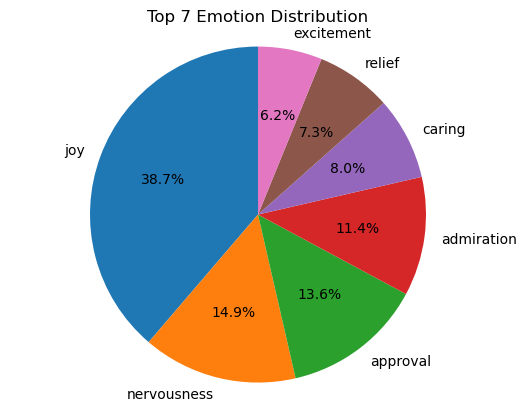

C:\Users\semal\AppData\Local\Temp\ipykernel_21344\1772255867.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


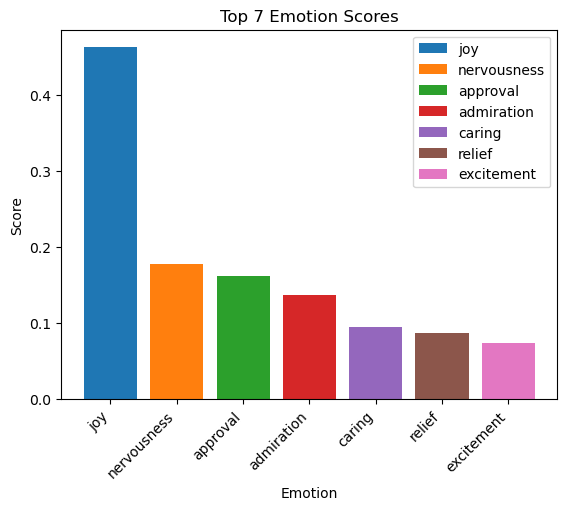

In [28]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

def plot_pie_chart(labels, scores):
    fig, ax = plt.subplots()
    ax.pie(scores, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    plt.title("Top {} Emotion Distribution".format(len(labels)))
    plt.show()

def plot_bar_graph(labels, scores, colors=None):
    if colors is None:
        cmap = get_cmap('tab10')
        colors = cmap.colors[:len(labels)]
    
    bars = plt.bar(labels, scores, color=colors)
    plt.xlabel('Emotion')
    plt.ylabel('Score')
    plt.title('Top {} Emotion Scores'.format(len(labels)))
    plt.xticks(rotation=45, ha='right')

    # Creating a legend with colored bars
    plt.legend(bars, labels)

    plt.show()

top_labels = [item['label'] for item in result[:7]]
top_scores = [item['score'] for item in result[:7]]

# Plotting the pie chart
plot_pie_chart(top_labels, top_scores)
plot_bar_graph(top_labels, top_scores)
